In [5]:
import os
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

In [3]:
# load data
path = 'c:/Users/bill/Documents/projects/data/covid19/open_research'
all_sources = pd.read_csv(os.path.join(path, 'metadata.csv'), low_memory=False)

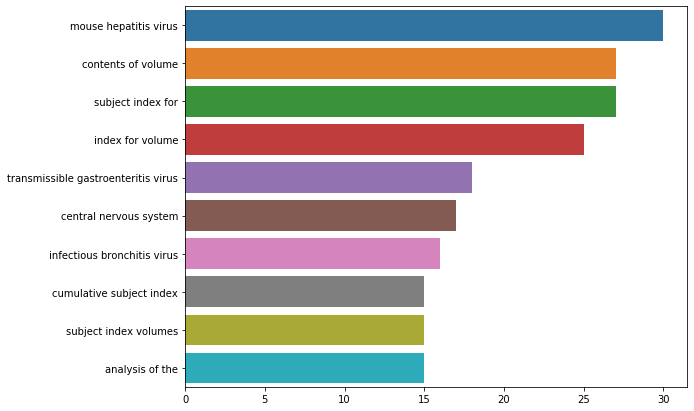

In [24]:
n = 3
corpus = all_sources['title'].dropna()[:1000]

# fit a ngram model
vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)

# covert corpus to token counts: W x G
bag_of_words = vec.transform(corpus)

# sum for each G: 1 x G
sum_words = bag_of_words.sum(axis=0) 

# get each word from the vocabulary and extract the associated count
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

# sort them in descending order
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)[:10]

# pr
tokens, freq = map(list, zip(*words_freq))
plt.figure(figsize=(9,7))
sns.barplot(x=freq,y=tokens)